<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/%5B2023.01.23%5D%20knn%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 데이터 준비**

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

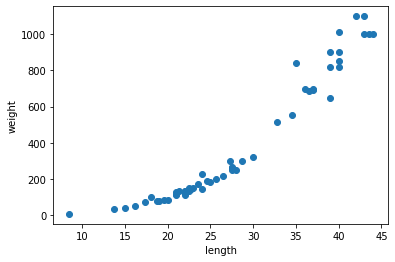

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

knn 회귀는 knn과 달리 satisfactory안 씀. 왜냐? knn은 분류된 집합 중 어느 집합에 속하는지 찾아주는 거라서 분류?? 해줘야 하는데 회귀는 집합 분류필요없어서. knn은 길이 넣으면 무게 예상해주는 것 같은 예상값을 구해줌. 함수 같은겨 

In [8]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [10]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [11]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [12]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


**2. 결정 계수 r^2**

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [16]:
knr.score(test_input, test_target)

0.991719046393267

In [17]:
from sklearn.metrics import mean_absolute_error

In [19]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae) 

24.421428571428574


무게가 실제 값이랑 24.~kg 차이난다는 말

In [20]:
for i in range(50, 100, 10):
  print(i, knr.predict([[i]]))

50 [990.]
60 [990.]
70 [990.]
80 [990.]
90 [990.]


**3. 과대 적합 vs 과소 적합 -> 과소 적합! 과대 적합은 무조건 막아야 함. **

In [21]:
print(knr.score(train_input, train_target))

0.9738567042655247


과대 적합이 났기 때문에 이웃 개수를 줄여서 과대 적합 방지

In [ ]:
# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3
# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

In [22]:
print(knr.score(test_input, test_target))

0.991719046393267


**확인**

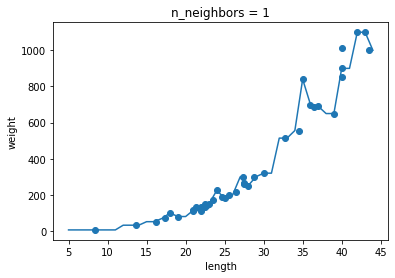

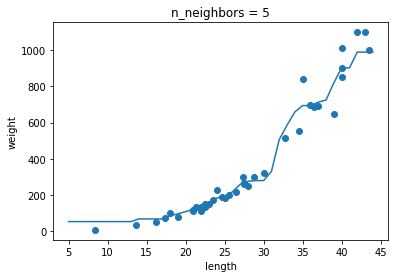

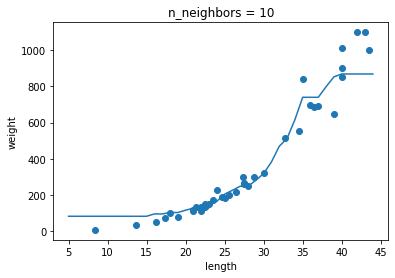

In [24]:
# k-nn 회귀 객체 생성
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()